In [52]:
import pandas as pd

# Load the data from both files
data_before_cleaning = pd.read_csv('../cleaning/output/merged_file.tsv', delimiter='\t')
data_after_cleaning = pd.read_csv('../cleaning/output/data_use_visualize.tsv', delimiter='\t')

# Check the first few rows of each dataset to understand the structure
before_cleaning_head = data_before_cleaning.head()
after_cleaning_head = data_after_cleaning.head()

(before_cleaning_head, after_cleaning_head)

(                                                 Tên  Diện tích  Mặt tiền  \
 0                Nhà riêng tại đường Hoàng Quốc Việt         96         7   
 1                            Bán đất tại xã An Khánh         48         4   
 2        Căn hộ chung cư tại Chung cư CT3 Lê Đức Thọ        128         0   
 3                        Nhà riêng tại đường Tư Đình         65         0   
 4  Nhà biệt thự, liền kề tại Khu đô thị mới Linh Đàm        280        14   
 
    Mức giá  Hướng nhà  Số phòng ngủ  Số toilet Nội thất  Pháp lý        lat  \
 0    28.00          0             0          0   Đầy đủ        2  21.046114   
 1     1.97        110             0          0      NaN        2  20.989575   
 2     5.12       1001             3          2   Đầy đủ        2  21.030434   
 3     7.90       1100             1          1      NaN        2  21.028876   
 4    50.00          0             6          7      NaN        2  20.971457   
 
           lon                                  

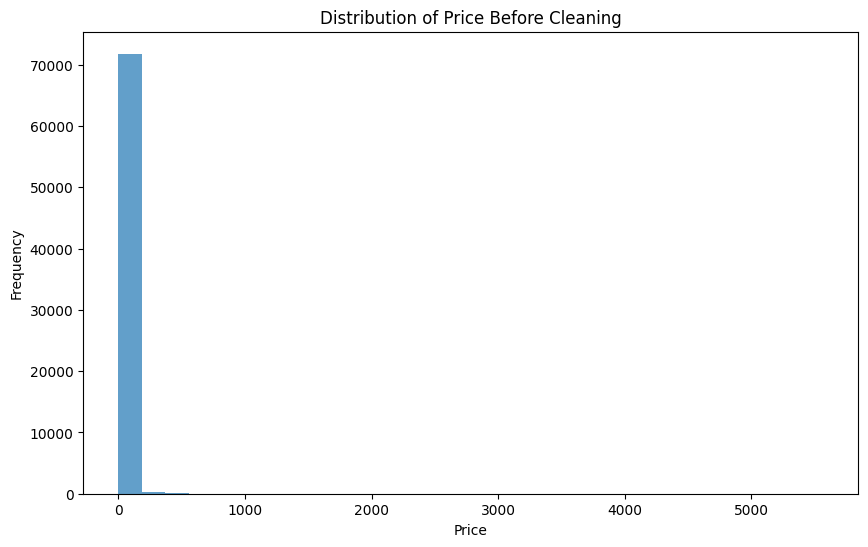

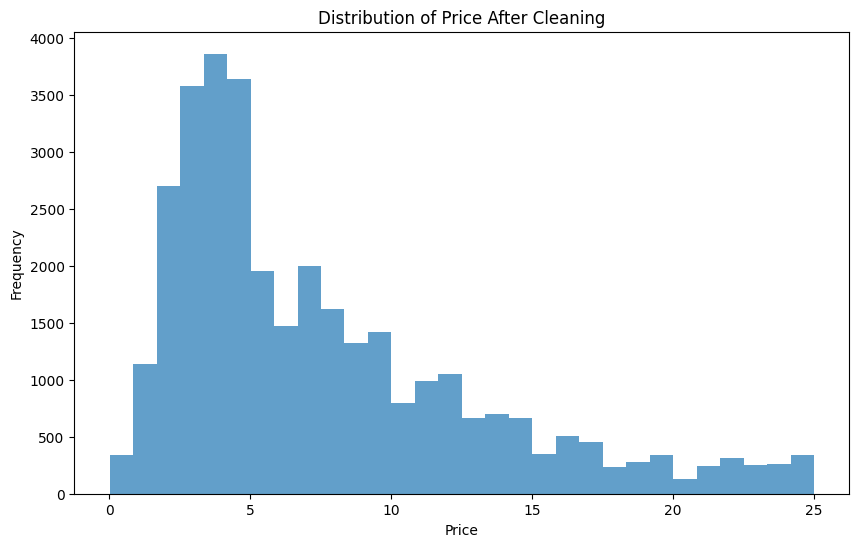

In [53]:
import matplotlib.pyplot as plt

# Function to create histograms
def plot_histograms(df, column, title):
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=30, alpha=0.7)
    plt.title(title)
    plt.xlabel('Price')
    plt.ylabel('Frequency')
    plt.show()

# Plot histograms for 'Mức giá' before and after cleaning
plot_histograms(data_before_cleaning, 'Mức giá', 'Distribution of Price Before Cleaning')
plot_histograms(data_after_cleaning, 'Mức giá', 'Distribution of Price After Cleaning')

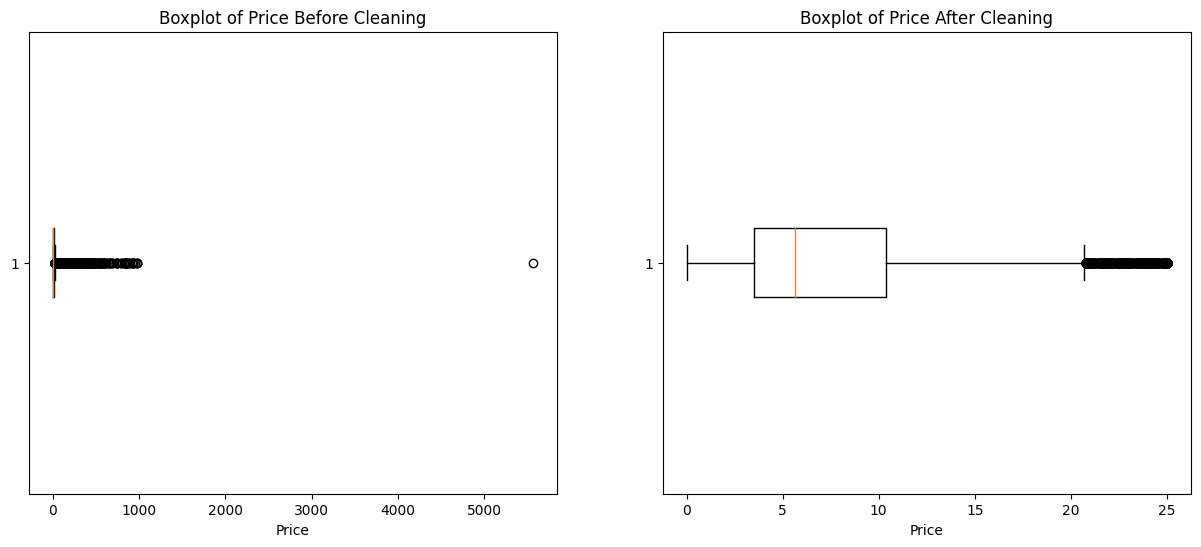

In [54]:
# Plot boxplots for 'Mức giá' before and after cleaning to show outliers handling
def plot_boxplots(df_before, df_after, column, title_before, title_after):
    fig, ax = plt.subplots(1, 2, figsize=(15, 6))
    
    # Before cleaning
    ax[0].boxplot(df_before[column].dropna(), vert=False) # Drop NaN values for plotting
    ax[0].set_title(title_before)
    ax[0].set_xlabel('Price')
    
    # After cleaning
    ax[1].boxplot(df_after[column].dropna(), vert=False) # Drop NaN values for plotting
    ax[1].set_title(title_after)
    ax[1].set_xlabel('Price')
    
    plt.show()

plot_boxplots(data_before_cleaning, data_after_cleaning, 'Mức giá', 'Boxplot of Price Before Cleaning', 'Boxplot of Price After Cleaning')

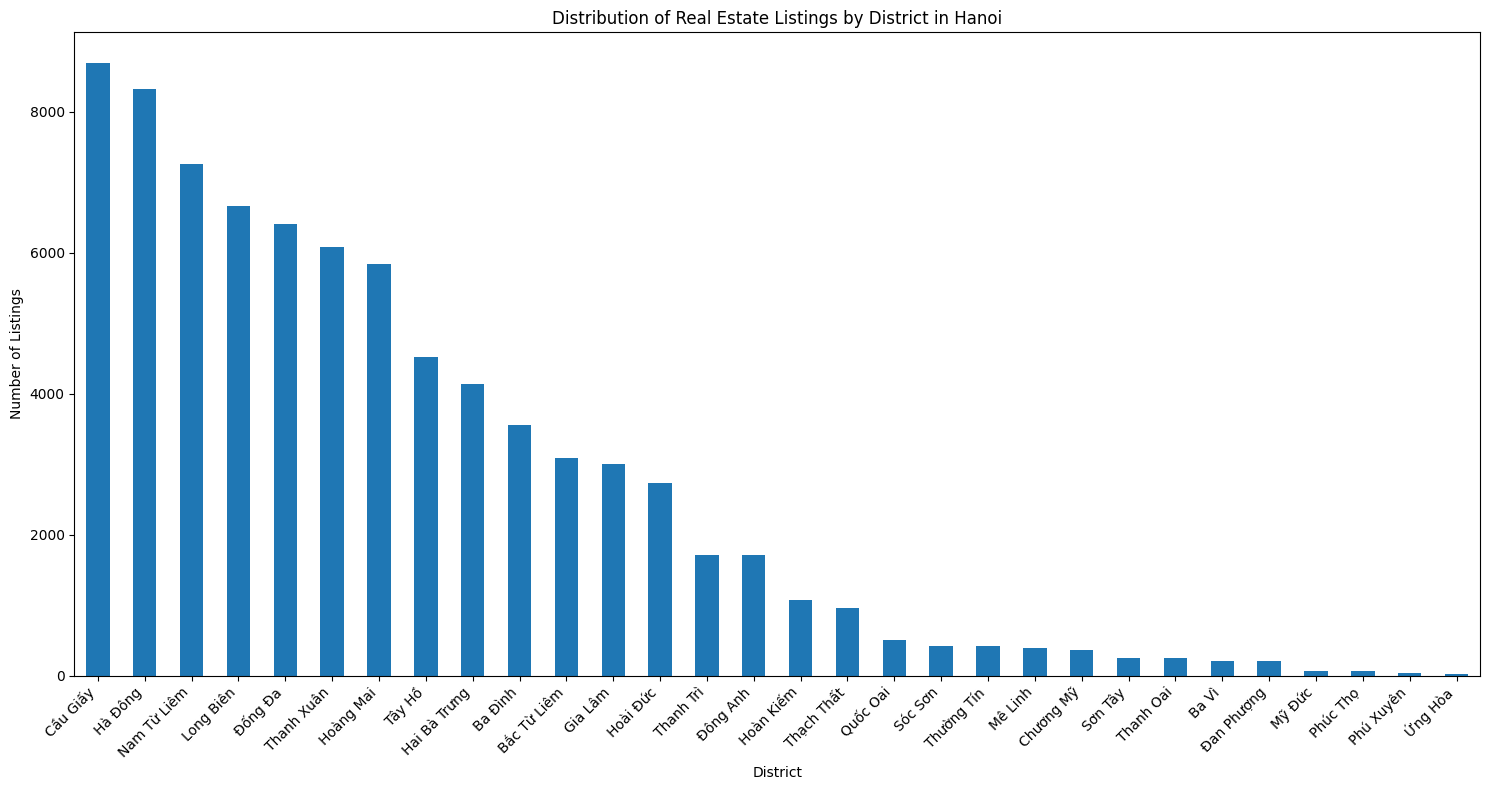

In [55]:
district_info = data_before_cleaning['Quận'].value_counts()

plt.figure(figsize=(15, 8))
district_info.plot(kind='bar')
plt.title('Distribution of Real Estate Listings by District in Hanoi')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout() 
plt.show()

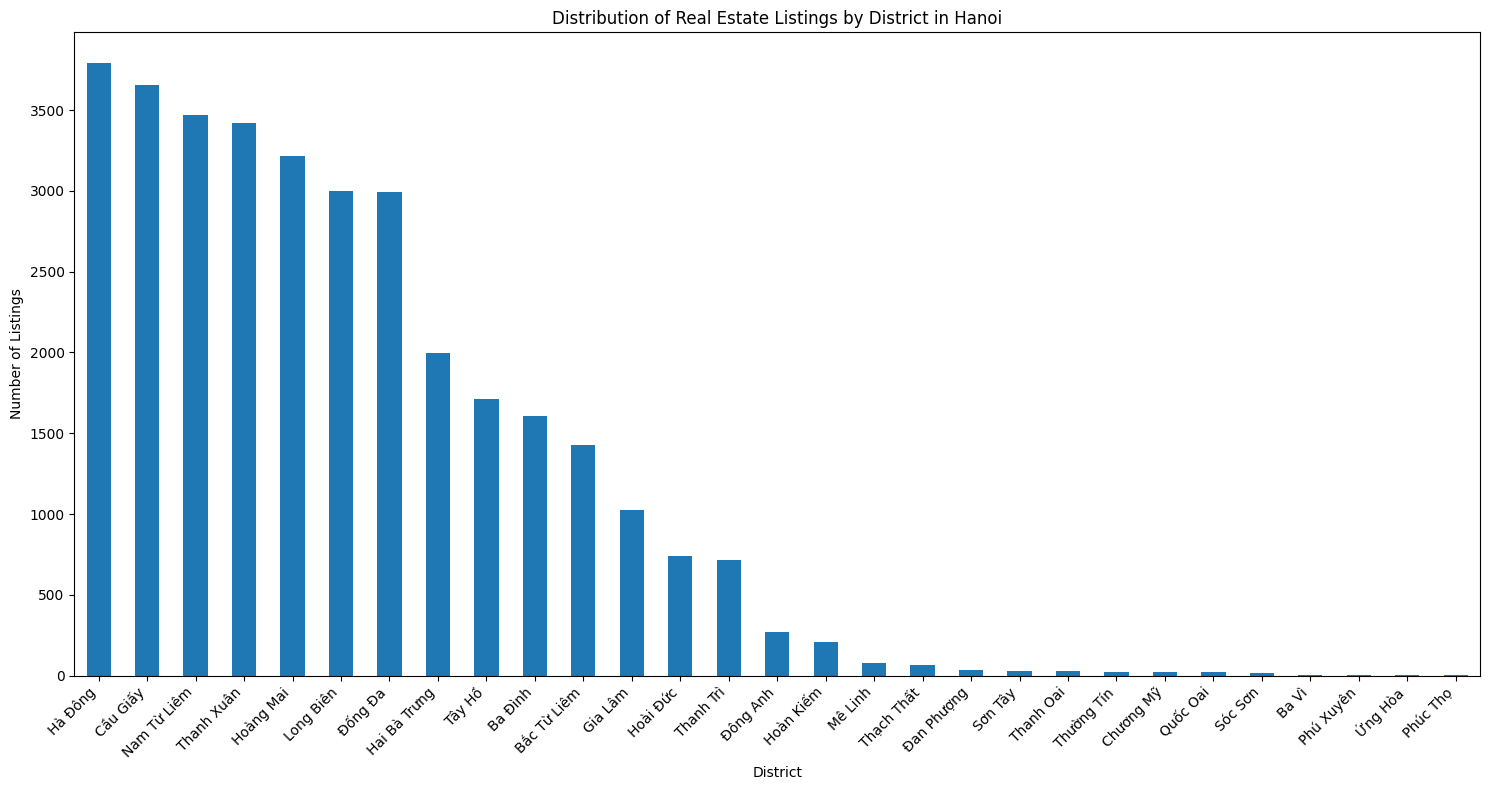

In [56]:
district_info = data_after_cleaning['Quận'].value_counts()

plt.figure(figsize=(15, 8))
district_info.plot(kind='bar')
plt.title('Distribution of Real Estate Listings by District in Hanoi')
plt.xlabel('District')
plt.ylabel('Number of Listings')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [57]:
import folium

def plot_map(df, lat_col, lon_col, title):
    map_center = [df[lat_col].mean(), df[lon_col].mean()]
    map_hanoi = folium.Map(location=map_center, zoom_start=12)

    for idx, row in df.iterrows():
        folium.CircleMarker(location=[row[lat_col], row[lon_col]],
                            radius=3,
                            color='blue',
                            fill=True,
                            fill_color='blue',
                            fill_opacity=0.6).add_to(map_hanoi)

    title_html = f'''
                 <h3 align="center" style="font-size:20px"><b>{title}</b></h3>
                 '''
    map_hanoi.get_root().html.add_child(folium.Element(title_html))
    
    return map_hanoi

map_after_cleaning = plot_map(data_after_cleaning, 'lat', 'lon', 'Hanoi Real Estate Distribution After Cleaning')

map_file_path = './hanoi_real_estate_map_after_cleaning.html'
map_after_cleaning.save(map_file_path)
map_file_path

'./hanoi_real_estate_map_after_cleaning.html'

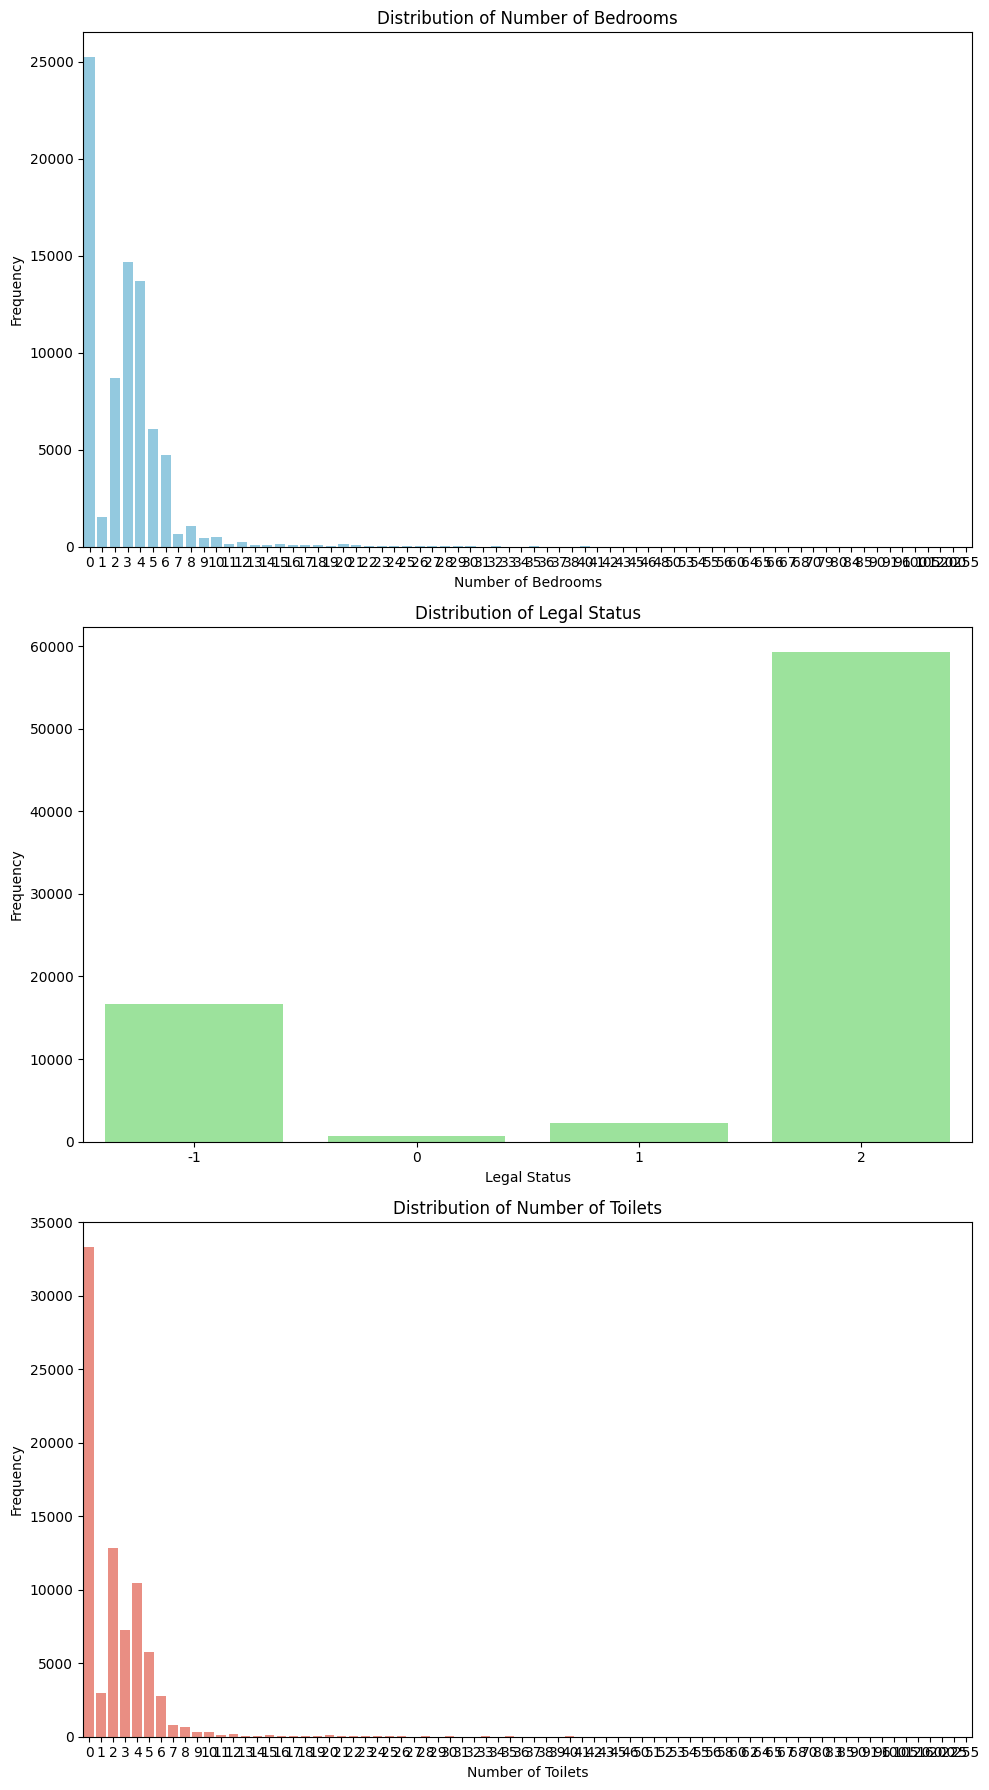

In [58]:
import seaborn as sns

# Create subplots for the distribution of 'Số phòng ngủ' (Number of Bedrooms), 'Pháp lý' (Legal), and 'Số toilet' (Number of Toilets)
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Distribution of 'Số phòng ngủ' (Number of Bedrooms)
sns.countplot(data=data_before_cleaning, x='Số phòng ngủ', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Number of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Frequency')

# Distribution of 'Pháp lý' (Legal)
sns.countplot(data=data_before_cleaning, x='Pháp lý', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Legal Status')
axes[1].set_xlabel('Legal Status')
axes[1].set_ylabel('Frequency')

# Distribution of 'Số toilet' (Number of Toilets)
sns.countplot(data=data_before_cleaning, x='Số toilet', ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Number of Toilets')
axes[2].set_xlabel('Number of Toilets')
axes[2].set_ylabel('Frequency')

# Adjust layout for readability
plt.tight_layout()
plt.show()

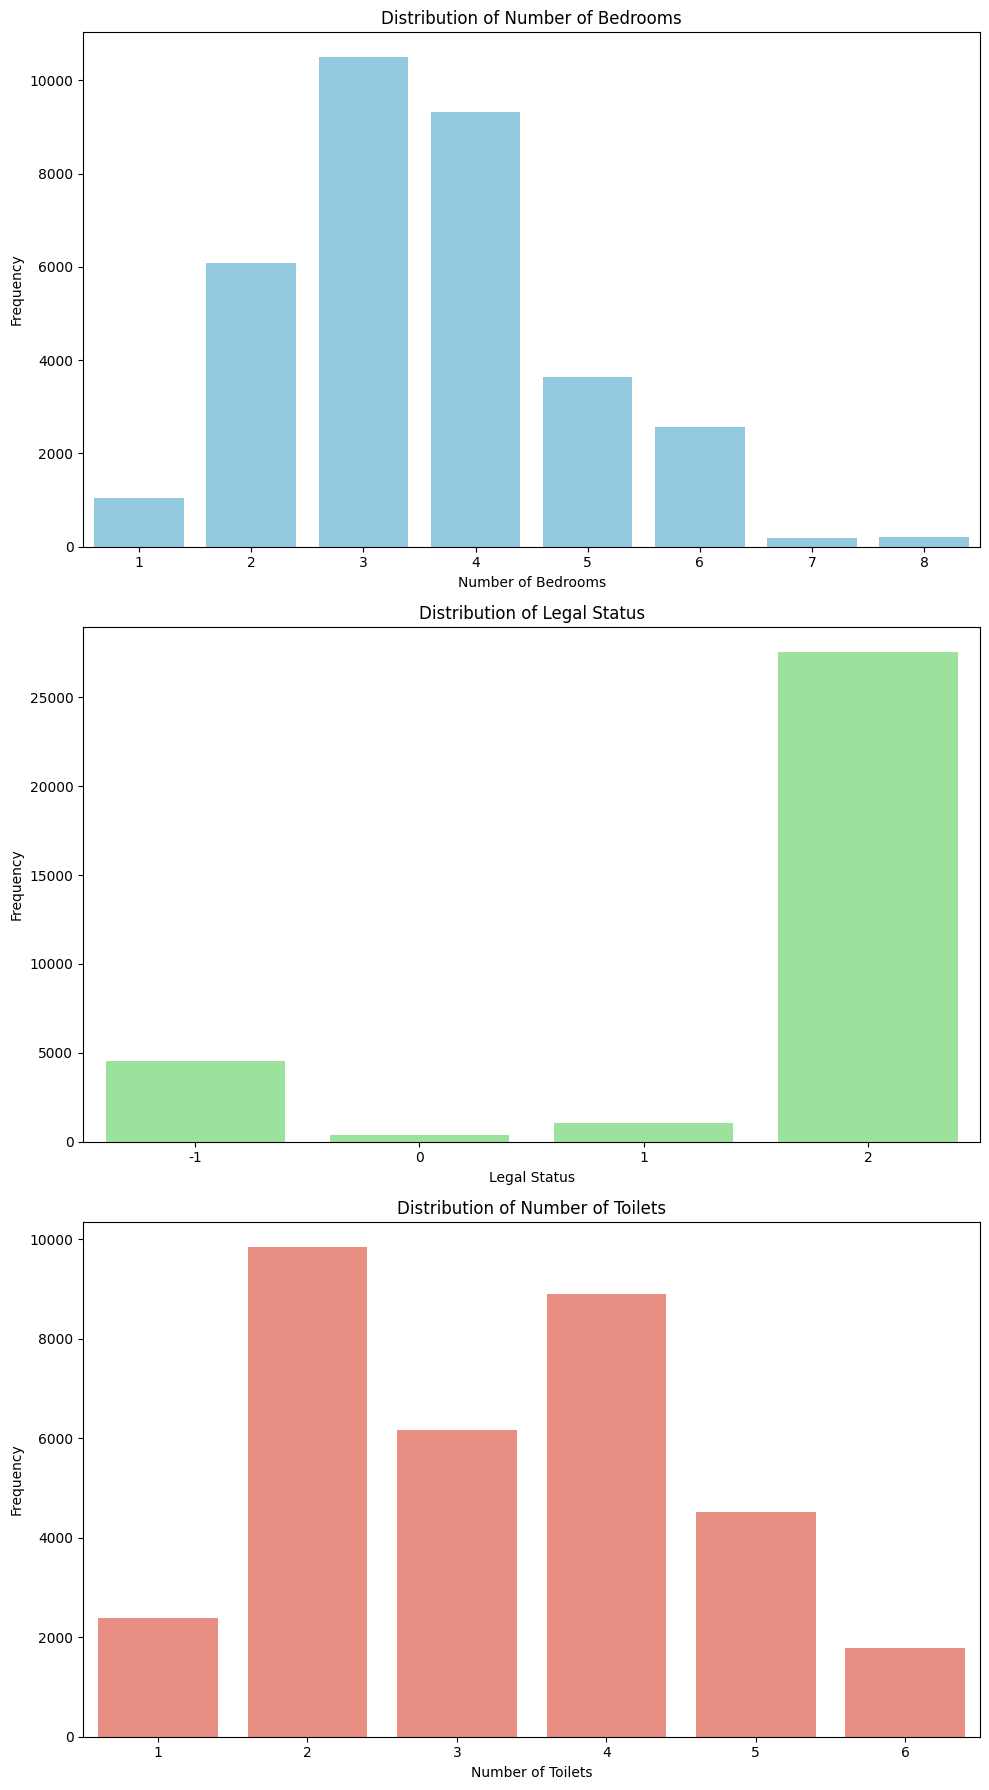

In [59]:
import seaborn as sns
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Distribution of 'Số phòng ngủ' (Number of Bedrooms)
sns.countplot(data=data_after_cleaning, x='Số phòng ngủ', ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Number of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')
axes[0].set_ylabel('Frequency')

# Distribution of 'Pháp lý' (Legal)
sns.countplot(data=data_after_cleaning, x='Pháp lý', ax=axes[1], color='lightgreen')
axes[1].set_title('Distribution of Legal Status')
axes[1].set_xlabel('Legal Status')
axes[1].set_ylabel('Frequency')

# Distribution of 'Số toilet' (Number of Toilets)
sns.countplot(data=data_after_cleaning, x='Số toilet', ax=axes[2], color='salmon')
axes[2].set_title('Distribution of Number of Toilets')
axes[2].set_xlabel('Number of Toilets')
axes[2].set_ylabel('Frequency')

# Adjust layout for readability
plt.tight_layout()
plt.show()

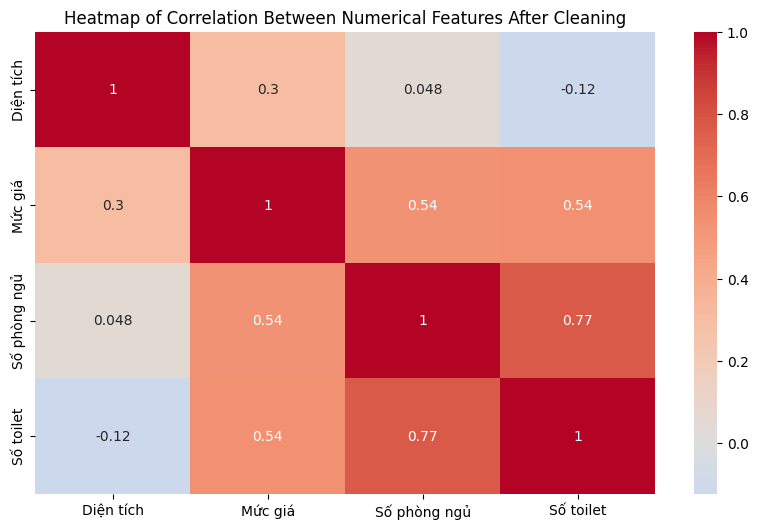

In [60]:
plt.figure(figsize=(10, 6))
corr = data_after_cleaning[['Diện tích', 'Mức giá', 'Số phòng ngủ', 'Số toilet']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Between Numerical Features After Cleaning')
plt.show()

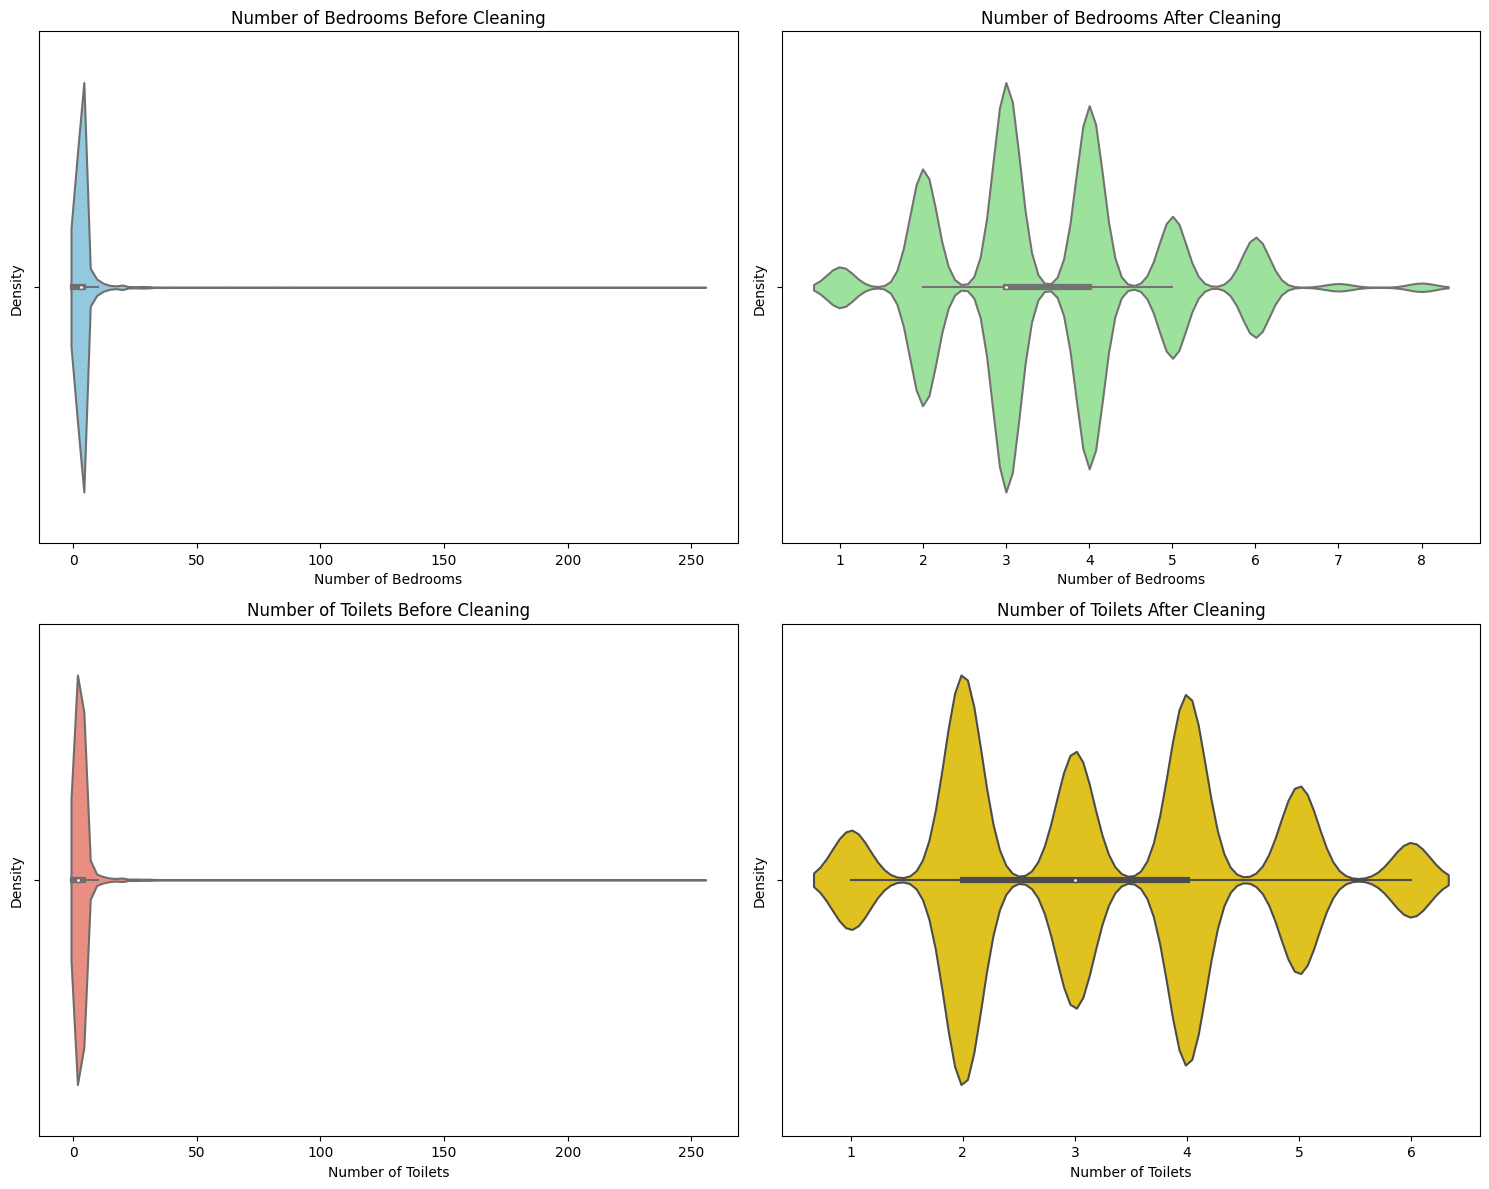

In [62]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Violin plot for 'Số phòng ngủ' before cleaning
sns.violinplot(data=data_before_cleaning, x='Số phòng ngủ', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Number of Bedrooms Before Cleaning')
axes[0, 0].set_xlabel('Number of Bedrooms')
axes[0, 0].set_ylabel('Density')

# Violin plot for 'Số phòng ngủ' after cleaning
sns.violinplot(data=data_after_cleaning, x='Số phòng ngủ', ax=axes[0, 1], color='lightgreen')
axes[0, 1].set_title('Number of Bedrooms After Cleaning')
axes[0, 1].set_xlabel('Number of Bedrooms')
axes[0, 1].set_ylabel('Density')

# Violin plot for 'Số toilet' before cleaning
sns.violinplot(data=data_before_cleaning, x='Số toilet', ax=axes[1, 0], color='salmon')
axes[1, 0].set_title('Number of Toilets Before Cleaning')
axes[1, 0].set_xlabel('Number of Toilets')
axes[1, 0].set_ylabel('Density')

# Violin plot for 'Số toilet' after cleaning
sns.violinplot(data=data_after_cleaning, x='Số toilet', ax=axes[1, 1], color='gold')
axes[1, 1].set_title('Number of Toilets After Cleaning')
axes[1, 1].set_xlabel('Number of Toilets')
axes[1, 1].set_ylabel('Density')

plt.tight_layout()
plt.show()

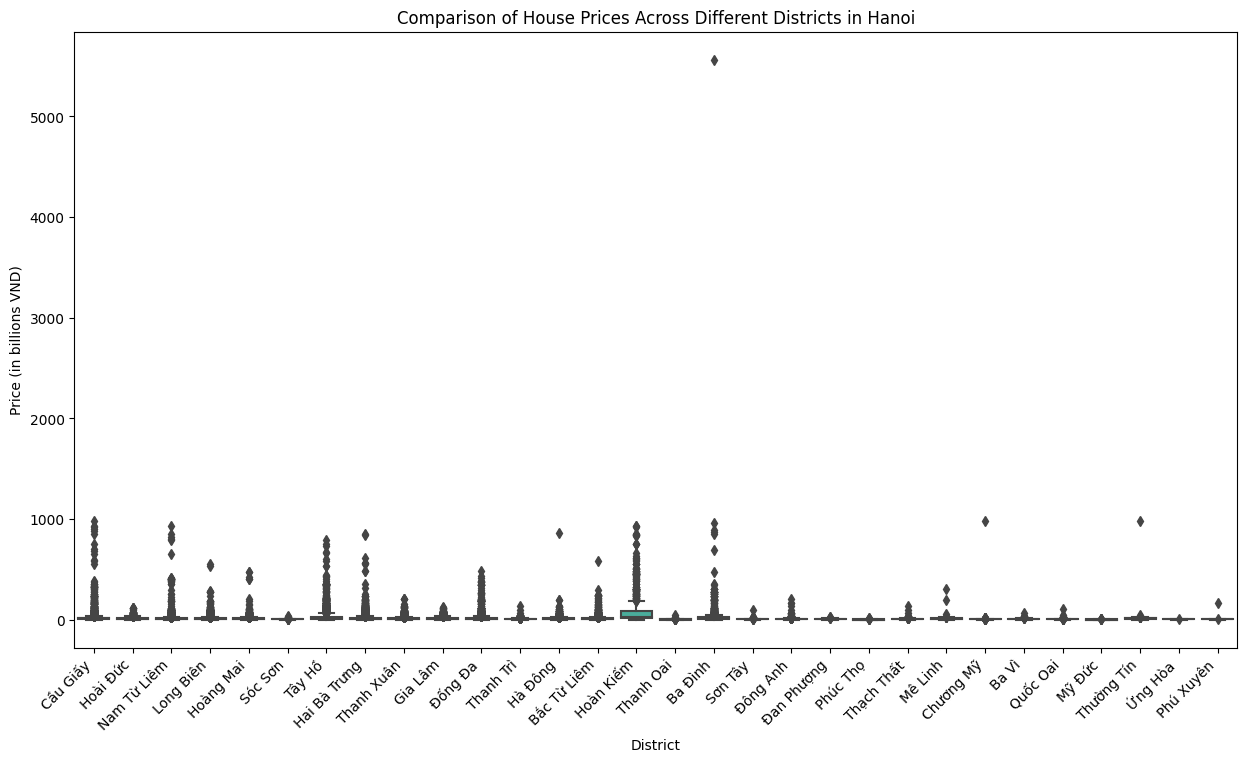

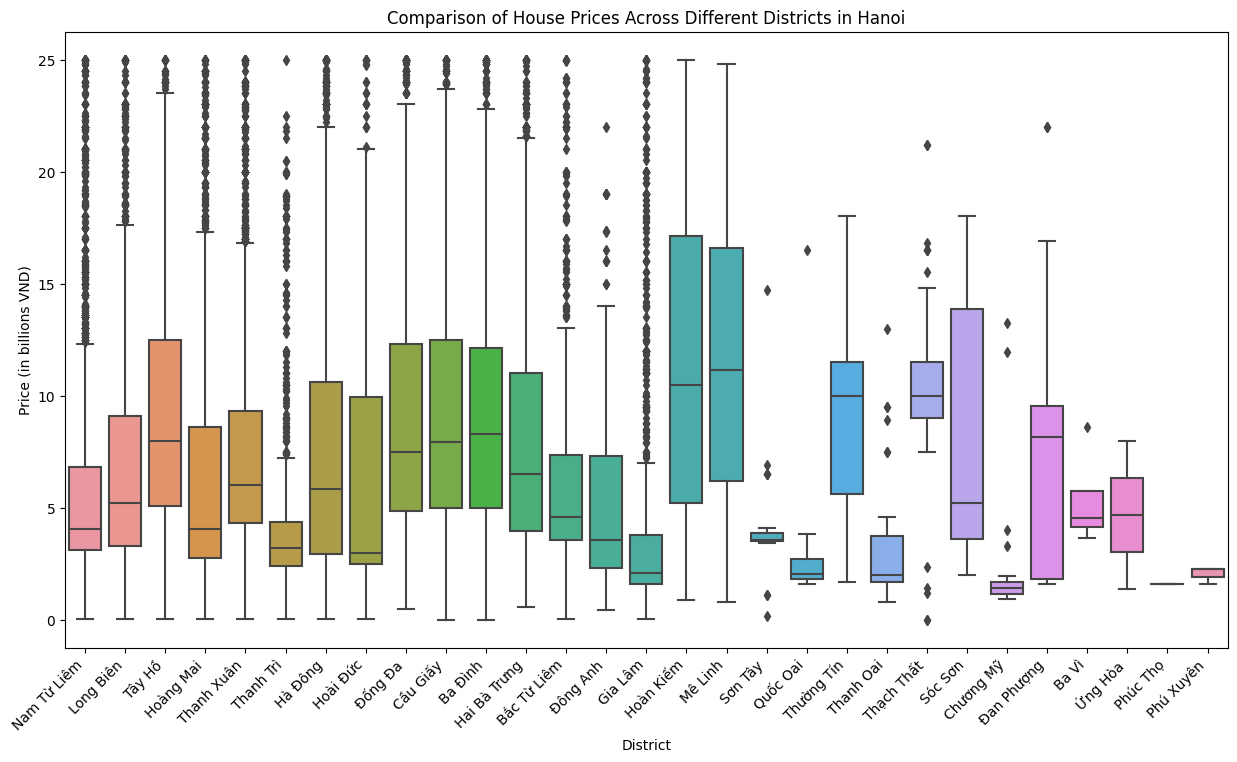

In [63]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=data_before_cleaning, x='Quận', y='Mức giá')
plt.title('Comparison of House Prices Across Different Districts in Hanoi')
plt.xlabel('District')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (in billions VND)')
plt.show()

plt.figure(figsize=(15, 8))
sns.boxplot(data=data_after_cleaning, x='Quận', y='Mức giá')
plt.title('Comparison of House Prices Across Different Districts in Hanoi')
plt.xlabel('District')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Price (in billions VND)')
plt.show()

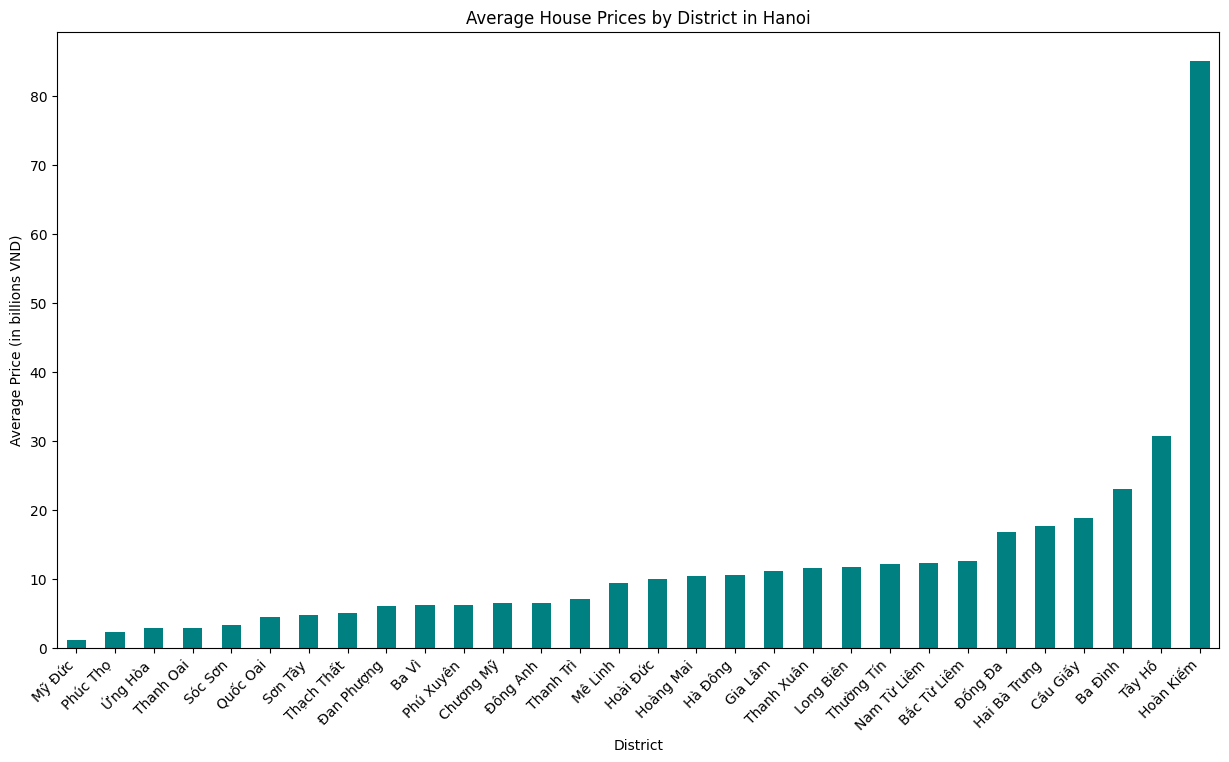

In [64]:
average_prices_by_district = data_before_cleaning.groupby('Quận')['Mức giá'].mean().sort_values()

plt.figure(figsize=(15, 8))
average_prices_by_district.plot(kind='bar', color='teal')
plt.title('Average House Prices by District in Hanoi')
plt.xlabel('District')
plt.ylabel('Average Price (in billions VND)')
plt.xticks(rotation=45, ha='right')  
plt.show()